In [48]:
# This cell is necessary only if you are running on Google Colab. It downloads the files to your
# Colab instance so you don't have to upload them here.

import requests

def save_file(url, file_name):
    r = requests.get(url)
    with open(file_name, 'wb') as f:
      f.write(r.content)

save_file('https://courses.cs.washington.edu/courses/cse416/21sp/homework/hw6/edx_train.csv', 
          'edx_train.csv')
save_file('https://courses.cs.washington.edu/courses/cse416/21sp/homework/hw6/edx_test.csv', 
          'edx_test.csv')

**Classifier 1: Logistic Classifier**

1. Pre-process the train dataset 


In [49]:
import pandas as pd

In [50]:
#read the "edx_train" dataset
train_data = pd.read_csv('edx_train.csv')

In [51]:
# observe the first 5 rows of the dataset
train_data.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,1,3/10/13,7/29/13,1161.0,50.0,NaN,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,0.85,3/13/13,8/1/13,1360.0,10.0,NaN,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,1,8/2/12,7/25/13,77.0,18.0,NaN,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,0.85,1/23/13,8/13/13,1425.0,29.0,NaN,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,0,3/5/13,3/5/13,6.0,1.0,NaN,1.0,0


In [52]:
#get more information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8758 entries, 0 to 8757
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          8758 non-null   object 
 1   userid_DI          8758 non-null   object 
 2   registered         8758 non-null   int64  
 3   viewed             8758 non-null   int64  
 4   explored           8758 non-null   int64  
 5   certified          8758 non-null   int64  
 6   final_cc_cname_DI  8758 non-null   object 
 7   LoE_DI             7792 non-null   object 
 8   YoB                7844 non-null   float64
 9   gender             7983 non-null   object 
 10  grade              8388 non-null   object 
 11  start_time_DI      8758 non-null   object 
 12  last_event_DI      7250 non-null   object 
 13  nevents            7119 non-null   float64
 14  ndays_act          7119 non-null   float64
 15  nplay_video        2011 non-null   float64
 16  nchapters          6195 

In [53]:
# know the columns of the dataset
train_data.columns

Index(['course_id', 'userid_DI', 'registered', 'viewed', 'explored',
       'certified', 'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts'],
      dtype='object')

In [54]:
#convert the data type of 'grade' from string to float
train_data['grade'] = pd.to_numeric(train_data['grade'], errors='coerce')

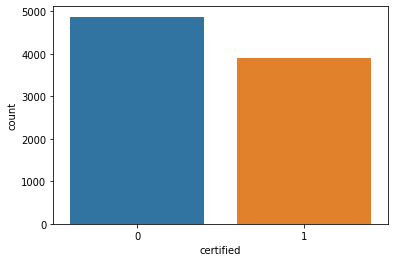

In [55]:
#explore the distribution of certified in the train dataset
import seaborn as sns

sns.countplot(x='certified', data=train_data)

Insight Learned: From the graph above, we learned that in the train dataset, more than 50% of the IDs did not get certified. 

**2. Create and process new dataset "train_data_new"**

In [56]:
#select features and create new dataframe 'train_data_new' using the selected features

features = [
            'course_id',
            'registered',
            'viewed',
            'explored',
            'final_cc_cname_DI',
            'LoE_DI',
            'YoB',
            'gender',
            'grade',
            'nevents', 
            'ndays_act', 
            'nplay_video',
            'nchapters', 
            'nforum_posts'
            ]

target = 'certified'

#create new dataset "train_data_new" using the selected features and target
train_data_new = train_data[features + [target]]

#explore the first 5 rows of "train_data_new"
train_data_new.head()


,course_id,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified
0,HarvardX/CS50x/2012,1,1,1,United States,Master's,1984.0,m,1.00,1161.0,50.0,NaN,12.0,0,1
1,HarvardX/ER22x/2013_Spring,1,1,1,United Kingdom,Master's,1985.0,f,0.85,1360.0,10.0,NaN,29.0,0,1
2,HarvardX/CS50x/2012,1,1,1,India,NaN,NaN,NaN,1.00,77.0,18.0,NaN,7.0,0,1
3,HarvardX/ER22x/2013_Spring,1,1,1,United Kingdom,Bachelor's,1982.0,m,0.85,1425.0,29.0,NaN,34.0,0,1
4,HarvardX/CS50x/2012,1,1,0,United States,Secondary,1989.0,m,0.00,6.0,1.0,NaN,1.0,0,0


In [57]:
#check missing values for columns in train_data_new

nan_values = train_data_new.isna()
nan_columns = nan_values.any()

columns_with_nan = train_data_new.columns[nan_columns].tolist()
print(columns_with_nan)

['LoE_DI', 'YoB', 'gender', 'grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters']


In [58]:
#deal with missing values in the train_data_new dataset

import numpy as np

#replace column "YoB", "LoE_DI", "gender" with mode 
train_data_new['YoB'].fillna(value=train_data_new['YoB'].mode()[0], inplace=True)
train_data_new['LoE_DI'].fillna(value=train_data_new['LoE_DI'].mode()[0], inplace=True)
train_data_new['gender'].fillna(value=train_data_new['gender'].mode()[0], inplace=True)


#replace column "grade", 'nevents', 'ndays_act', 'nplay_video', 'nchapters' with mean
train_data_new['grade'].fillna(value=train_data_new['grade'].mean(), inplace=True)

train_data_new['nevents'].fillna(value=train_data_new['nevents'].mean(), inplace=True)

train_data_new['ndays_act'].fillna(value=train_data_new['ndays_act'].mean(), inplace=True)

train_data_new['nplay_video'].fillna(value=train_data_new['nplay_video'].mean(), inplace=True)

train_data_new['nchapters'].fillna(value=train_data_new['nchapters'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [59]:
#since there are lots of categorical variables, I conduct one-hot encoding to turn a categorical feature into a series of binary numerical features

train_data_new = pd.get_dummies(train_data_new)

features = list(train_data_new.columns)

features.remove('certified')

features

['registered',
 'viewed',
 'explored',
 'YoB',
 'grade',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'course_id_HarvardX/CB22x/2013_Spring',
 'course_id_HarvardX/CS50x/2012',
 'course_id_HarvardX/ER22x/2013_Spring',
 'course_id_HarvardX/PH207x/2012_Fall',
 'course_id_HarvardX/PH278x/2013_Spring',
 'final_cc_cname_DI_Australia',
 'final_cc_cname_DI_Bangladesh',
 'final_cc_cname_DI_Brazil',
 'final_cc_cname_DI_Canada',
 'final_cc_cname_DI_China',
 'final_cc_cname_DI_Colombia',
 'final_cc_cname_DI_Egypt',
 'final_cc_cname_DI_France',
 'final_cc_cname_DI_Germany',
 'final_cc_cname_DI_Greece',
 'final_cc_cname_DI_India',
 'final_cc_cname_DI_Indonesia',
 'final_cc_cname_DI_Japan',
 'final_cc_cname_DI_Mexico',
 'final_cc_cname_DI_Morocco',
 'final_cc_cname_DI_Nigeria',
 'final_cc_cname_DI_Other Africa',
 'final_cc_cname_DI_Other East Asia',
 'final_cc_cname_DI_Other Europe',
 'final_cc_cname_DI_Other Middle East/Central Asia',
 'final_cc_cname_DI_Other North & Ce

**3. Run logistic regression classifier**

In [60]:
#set up the x and y 
X = train_data_new[features]

y = train_data_new[target]

#split train_data_new into train dataset and validation dataset, with validation being 10%, test being 20% and training being 70%

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size=0.125)


In [61]:
#again, check missing values for columns in train_data_new to ensure that all the missing values have been replaced

nan_values = train_data_new.isna()
nan_columns = nan_values.any()

columns_with_nan = train_data_new.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [62]:
# Set up the regularization penalities to pick the most suitable penalty
l2_penalties = [0.01, 1, 4, 10, 1e2, 1e3, 1e5]
l2_penalty_names = [f'coefficients [L2={l2_penalty:.0e}]' 
                    for l2_penalty in l2_penalties]

In [63]:
#try different l2 penalties and generate a accuracy data table 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy_data = []

for l2_penalty, l2_penalty_column_name in zip(l2_penalties, l2_penalty_names):

    #  Train the model 
    logistic_model = LogisticRegression(penalty = 'l2', C = 1/l2_penalty, fit_intercept = False).fit(X_train, y_train)
    
    #  Calculate and save the train and validation accuracies
    model_pred_train = logistic_model.predict(X_train)
    model_pred_validation = logistic_model.predict(X_validation)
    model_train_accuracy = accuracy_score(y_train, model_pred_train)
    model_validation_accuracy = accuracy_score(y_validation, model_pred_validation)
    accuracy_data.append({'l2_penalty': l2_penalty,
                           'train_accuracy': model_train_accuracy,
                           'validation_accuracy': model_validation_accuracy
                          })

accuracies_table = pd.DataFrame(accuracy_data)

accuracies_table

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,l2_penalty,train_accuracy,validation_accuracy
0,0.01,0.983524,0.987443
1,1.00,0.983687,0.985160
2,4.00,0.990049,0.992009
3,10.00,0.988744,0.989726
4,100.00,0.962806,0.972603
5,1000.00,0.924144,0.941781
6,100000.00,0.872920,0.886986


Insights Learned: From the table above, we can find that with l2_penalty being 4, the validation_accuracy has the maximum value of 0.992009. Therefore, we should select 4 as the l2_penalty for our model. 

In [64]:
# pick the l2 penalty with the highest validation accuracy

logistic_model_1 = LogisticRegression (penalty = 'l2', C = 1/4, fit_intercept = False).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


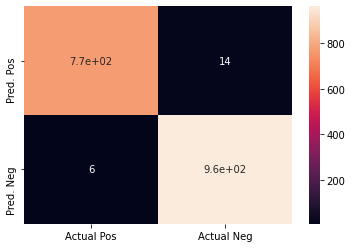

In [65]:
#use confusion matrix to estimate how this model will perform on the unseen data
def plot_confusion_matrix(tp, fp, fn, tn):
    """
    Plots a confusion matrix using the values 
       tp - True Positive
       fp - False Positive
       fn - False Negative
       tn - True Negative
    """
    data = np.matrix([[tp, fp], [fn, tn]])

    sns.heatmap(data,annot=True,xticklabels=['Actual Pos', 'Actual Neg']
              ,yticklabels=['Pred. Pos', 'Pred. Neg']) 

y_pred_test_log = logistic_model_1.predict(X_test)

df_confusion = pd.crosstab(y_test, y_pred_test_log, rownames=['Actual'], colnames=['Predicted'])
cnf_matrix=np.array(df_confusion)

tp=cnf_matrix[1,1]

tn=cnf_matrix[0,0]

fp=cnf_matrix[0,1]

fn=cnf_matrix[1,0]


plot_confusion_matrix(tp, fp, fn, tn)

Insights Learned: Confusion matrix helps to evaluate the model. From the matrix above, we can see that there are 14 false positive and 6 false negative. 

**4. Process the test dataset**

In [66]:
# read the test dataset 
test_data = pd.read_csv('edx_test.csv')

# explore the test dataset
print(test_data.head())

print(test_data.info())

print(test_data.columns)

                     course_id       userid_DI  ...  nchapters  nforum_posts
0          HarvardX/CS50x/2012  MHxPC130476531  ...       12.0             0
1   HarvardX/CB22x/2013_Spring  MHxPC130559898  ...        NaN             0
2    HarvardX/PH207x/2012_Fall  MHxPC130552712  ...       15.0             0
3  HarvardX/PH278x/2013_Spring  MHxPC130394971  ...        8.0             0
4   HarvardX/ER22x/2013_Spring  MHxPC130191077  ...       29.0             0

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          2920 non-null   object 
 1   userid_DI          2920 non-null   object 
 2   registered         2920 non-null   int64  
 3   viewed             2920 non-null   int64  
 4   explored           2920 non-null   int64  
 5   final_cc_cname_DI  2920 non-null   object 
 6   LoE_DI             

In [67]:
#convert the data type of 'grade' from string to float
test_data['grade'] = pd.to_numeric(test_data['grade'], errors='coerce')

In [71]:
#select features for test_data

features = [
            'course_id',
            'registered',
            'viewed',
            'explored',
            'final_cc_cname_DI',
            'LoE_DI',
            'YoB',
            'gender',
            'grade',
            'nevents', 
            'ndays_act', 
            'nplay_video',
            'nchapters', 
            'nforum_posts'
            ]

test_data_new = test_data[features] 

test_data_new.head()

,course_id,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,1,1,1,United Kingdom,Secondary,1971.0,m,1.00,132.0,34.0,NaN,12.0,0
1,HarvardX/CB22x/2013_Spring,1,0,0,Other South Asia,Bachelor's,1984.0,m,NaN,NaN,NaN,NaN,NaN,0
2,HarvardX/PH207x/2012_Fall,1,1,1,Egypt,Bachelor's,1985.0,f,0.81,2650.0,32.0,96.0,15.0,0
3,HarvardX/PH278x/2013_Spring,1,1,1,Nigeria,Secondary,1988.0,m,0.87,999.0,17.0,13.0,8.0,0
4,HarvardX/ER22x/2013_Spring,1,1,1,Other Middle East/Central Asia,NaN,NaN,NaN,0.90,2130.0,24.0,NaN,29.0,0


In [72]:
#check missing values for columns in test_data_new

nan_values = test_data_new.isna()
nan_columns = nan_values.any()

columns_with_nan = test_data_new.columns[nan_columns].tolist()
print(columns_with_nan)

['LoE_DI', 'YoB', 'gender', 'grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters']


In [73]:
#deal with nan values in the test_data_new dataset

import numpy as np

#replace column "YoB" with mode 
test_data_new['YoB'].fillna(value=test_data_new['YoB'].mode()[0], inplace=True)
test_data_new['LoE_DI'].fillna(value=test_data_new['LoE_DI'].mode()[0], inplace=True)
test_data_new['gender'].fillna(value=test_data_new['gender'].mode()[0], inplace=True)

#replace column "grade", 'nevents', 'ndays_act', 'nplay_video', 'nchapters' with mean
test_data_new['grade'].fillna(value=test_data_new['grade'].mean(), inplace=True)

test_data_new['nevents'].fillna(value=test_data_new['nevents'].mean(), inplace=True)

test_data_new['ndays_act'].fillna(value=test_data_new['ndays_act'].mean(), inplace=True)

test_data_new['nplay_video'].fillna(value=test_data_new['nplay_video'].mean(), inplace=True)

test_data_new['nchapters'].fillna(value=test_data_new['nchapters'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [74]:
#use one-hot encoding to turn a categorical feature into a series of binary numerical features 
test_data_new = pd.get_dummies(test_data_new)

features_test = list(test_data_new.columns)

test_data_new.head()

,registered,viewed,explored,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,gender_f,gender_m
0,1,1,1,1971.0,1.000000,132.000000,34.000000,682.412747,12.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,1,0,0,1984.0,0.395892,1541.620957,19.250108,682.412747,12.493042,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,1,1985.0,0.810000,2650.000000,32.000000,96.000000,15.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,1,1,1988.0,0.870000,999.000000,17.000000,13.000000,8.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1,1,1,1990.0,0.900000,2130.000000,24.000000,682.412747,29.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


**5. Make predictions using the features in test dataset**

In [75]:
#use the test data to make predictions
y_pred_test = logistic_model_1.predict(test_data_new[features_test])

In [76]:
#add the predictions back to the original dataset
test_data ['certified'] = y_pred_test

In [77]:
test_data.head()

,course_id,userid_DI,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified
0,HarvardX/CS50x/2012,MHxPC130476531,1,1,1,United Kingdom,Secondary,1971.0,m,1.00,10/30/12,6/27/13,132.0,34.0,NaN,12.0,0,1
1,HarvardX/CB22x/2013_Spring,MHxPC130559898,1,0,0,Other South Asia,Bachelor's,1984.0,m,NaN,2/6/13,11/17/13,NaN,NaN,NaN,NaN,0,0
2,HarvardX/PH207x/2012_Fall,MHxPC130552712,1,1,1,Egypt,Bachelor's,1985.0,f,0.81,10/20/12,1/18/13,2650.0,32.0,96.0,15.0,0,1
3,HarvardX/PH278x/2013_Spring,MHxPC130394971,1,1,1,Nigeria,Secondary,1988.0,m,0.87,12/27/12,8/22/13,999.0,17.0,13.0,8.0,0,1
4,HarvardX/ER22x/2013_Spring,MHxPC130191077,1,1,1,Other Middle East/Central Asia,NaN,NaN,NaN,0.90,5/31/13,9/7/13,2130.0,24.0,NaN,29.0,0,1


**6. Output the result**

In [78]:
#save the output to csv format
to_save = test_data[['userid_DI', 'certified']].copy()

from google.colab import files

to_save.to_csv('submission4.csv', index=False) 

files.download('submission4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Classifier 2: Random Forest Classifier **
1. Pre-process the train dataset

In [79]:
# we will continue to use the cleaned and transformed traing dataset "train_data_new"

# explore the datset again
train_data_new.head()

,registered,viewed,explored,YoB,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified,course_id_HarvardX/CB22x/2013_Spring,course_id_HarvardX/CS50x/2012,course_id_HarvardX/ER22x/2013_Spring,course_id_HarvardX/PH207x/2012_Fall,course_id_HarvardX/PH278x/2013_Spring,final_cc_cname_DI_Australia,final_cc_cname_DI_Bangladesh,final_cc_cname_DI_Brazil,final_cc_cname_DI_Canada,final_cc_cname_DI_China,final_cc_cname_DI_Colombia,final_cc_cname_DI_Egypt,final_cc_cname_DI_France,final_cc_cname_DI_Germany,final_cc_cname_DI_Greece,final_cc_cname_DI_India,final_cc_cname_DI_Indonesia,final_cc_cname_DI_Japan,final_cc_cname_DI_Mexico,final_cc_cname_DI_Morocco,final_cc_cname_DI_Nigeria,final_cc_cname_DI_Other Africa,final_cc_cname_DI_Other East Asia,final_cc_cname_DI_Other Europe,final_cc_cname_DI_Other Middle East/Central Asia,"final_cc_cname_DI_Other North & Central Amer., Caribbean",final_cc_cname_DI_Other Oceania,final_cc_cname_DI_Other South America,final_cc_cname_DI_Other South Asia,final_cc_cname_DI_Pakistan,final_cc_cname_DI_Philippines,final_cc_cname_DI_Poland,final_cc_cname_DI_Portugal,final_cc_cname_DI_Russian Federation,final_cc_cname_DI_Spain,final_cc_cname_DI_Ukraine,final_cc_cname_DI_United Kingdom,final_cc_cname_DI_United States,final_cc_cname_DI_Unknown/Other,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,gender_f,gender_m
0,1,1,1,1984.0,1.00,1161.0,50.0,650.731974,12.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,1,1,1,1985.0,0.85,1360.0,10.0,650.731974,29.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,1,1,1,1987.0,1.00,77.0,18.0,650.731974,7.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1982.0,0.85,1425.0,29.0,650.731974,34.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,1,1,0,1989.0,0.00,6.0,1.0,650.731974,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [80]:
# get the features 
features = list(train_data_new.columns)

features.remove('certified')

features

['registered',
 'viewed',
 'explored',
 'YoB',
 'grade',
 'nevents',
 'ndays_act',
 'nplay_video',
 'nchapters',
 'nforum_posts',
 'course_id_HarvardX/CB22x/2013_Spring',
 'course_id_HarvardX/CS50x/2012',
 'course_id_HarvardX/ER22x/2013_Spring',
 'course_id_HarvardX/PH207x/2012_Fall',
 'course_id_HarvardX/PH278x/2013_Spring',
 'final_cc_cname_DI_Australia',
 'final_cc_cname_DI_Bangladesh',
 'final_cc_cname_DI_Brazil',
 'final_cc_cname_DI_Canada',
 'final_cc_cname_DI_China',
 'final_cc_cname_DI_Colombia',
 'final_cc_cname_DI_Egypt',
 'final_cc_cname_DI_France',
 'final_cc_cname_DI_Germany',
 'final_cc_cname_DI_Greece',
 'final_cc_cname_DI_India',
 'final_cc_cname_DI_Indonesia',
 'final_cc_cname_DI_Japan',
 'final_cc_cname_DI_Mexico',
 'final_cc_cname_DI_Morocco',
 'final_cc_cname_DI_Nigeria',
 'final_cc_cname_DI_Other Africa',
 'final_cc_cname_DI_Other East Asia',
 'final_cc_cname_DI_Other Europe',
 'final_cc_cname_DI_Other Middle East/Central Asia',
 'final_cc_cname_DI_Other North & Ce

In [81]:
# run the model using random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
# find the feature importance

feature_importance = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_importance

grade                                                       0.333173
explored                                                    0.186027
ndays_act                                                   0.143623
nchapters                                                   0.130697
nevents                                                     0.089968
viewed                                                      0.048321
nplay_video                                                 0.014989
final_cc_cname_DI_Unknown/Other                             0.010437
course_id_HarvardX/CS50x/2012                               0.007415
course_id_HarvardX/ER22x/2013_Spring                        0.006775
YoB                                                         0.005219
course_id_HarvardX/PH207x/2012_Fall                         0.004257
course_id_HarvardX/CB22x/2013_Spring                        0.002375
nforum_posts                                                0.001618
final_cc_cname_DI_United States   

In [98]:
# select a list of important features using the importance scores shown above. I select 0.01 as the threshold. 
important_features = ['grade',
                      'explored',
                      'ndays_act',
                      'nchapters',
                      'nevents',
                      'viewed',
                      'nplay_video',
                      'final_cc_cname_DI_Unknown/Other'
                      ]

In [99]:
#tune the hyperparameters and get the most suitable hyperparameters for the model
from sklearn.model_selection import GridSearchCV

hyperparameters = {'n_estimators': [100, 200, 300], 
                   'max_depth':[1, 5, 10, 15, 20]
                  }

clf=RandomForestClassifier()   

search = GridSearchCV(estimator = clf, param_grid = hyperparameters, cv=6, n_jobs = -1, return_train_score=True)  

print(search.fit(X_train[important_features], y_train).best_params_)

{'max_depth': 5, 'n_estimators': 100}


In [100]:
# run the model again using the most suitable hyperparameters
clf=RandomForestClassifier(n_estimators=100, max_depth=5)
Random_Forest_Model = clf.fit(X_train[important_features], y_train)

In [101]:
# calculate the accuracy score using the validation dataset and training dataset
y_pred_val = Random_Forest_Model.predict(X_validation[important_features])
y_pred_train = Random_Forest_Model.predict(X_train[important_features])

from sklearn.metrics import accuracy_score

print(f'validation accuarcy score: {accuracy_score(y_validation, y_pred_val)}')
print(f'train accuracy score: {accuracy_score(y_train, y_pred_train)}')

validation accuarcy score: 0.997716894977169
train accuracy score: 0.9977161500815661


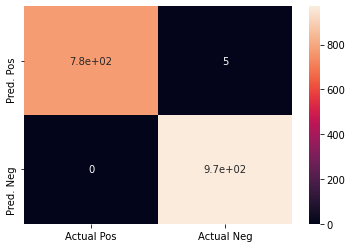

In [102]:
# plot the confusion matrixs for random forest model

def plot_confusion_matrix(tp, fp, fn, tn):
    """
    Plots a confusion matrix using the values 
       tp - True Positive
       fp - False Positive
       fn - False Negative
       tn - True Negative
    """
    data = np.matrix([[tp, fp], [fn, tn]])

    sns.heatmap(data,annot=True,xticklabels=['Actual Pos', 'Actual Neg']
              ,yticklabels=['Pred. Pos', 'Pred. Neg']) 

y_pred_randomforest = Random_Forest_Model.predict(X_test[important_features])
df_confusion = pd.crosstab(y_test, y_pred_randomforest, rownames=['Actual'], colnames=['Predicted'])
cnf_matrix=np.array(df_confusion)

tp=cnf_matrix[1,1]

tn=cnf_matrix[0,0]

fp=cnf_matrix[0,1]

fn=cnf_matrix[1,0]


plot_confusion_matrix(tp, fp, fn, tn)

Insights Learned: The confusion matrixs shows that for random forest model, there are 5 false positive and 0 false negative, which is lower than that of logistic model. 

In [103]:
#use test_data_new to make predictions

X_test_randomforest = test_data_new[important_features]

y_pred_test_randomforest = Random_Forest_Model.predict(X_test_randomforest)

test_data ['certified'] = y_pred_test_randomforest

test_data.head()


,course_id,userid_DI,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,certified
0,HarvardX/CS50x/2012,MHxPC130476531,1,1,1,United Kingdom,Secondary,1971.0,m,1.00,10/30/12,6/27/13,132.0,34.0,NaN,12.0,0,1
1,HarvardX/CB22x/2013_Spring,MHxPC130559898,1,0,0,Other South Asia,Bachelor's,1984.0,m,NaN,2/6/13,11/17/13,NaN,NaN,NaN,NaN,0,0
2,HarvardX/PH207x/2012_Fall,MHxPC130552712,1,1,1,Egypt,Bachelor's,1985.0,f,0.81,10/20/12,1/18/13,2650.0,32.0,96.0,15.0,0,1
3,HarvardX/PH278x/2013_Spring,MHxPC130394971,1,1,1,Nigeria,Secondary,1988.0,m,0.87,12/27/12,8/22/13,999.0,17.0,13.0,8.0,0,1
4,HarvardX/ER22x/2013_Spring,MHxPC130191077,1,1,1,Other Middle East/Central Asia,NaN,NaN,NaN,0.90,5/31/13,9/7/13,2130.0,24.0,NaN,29.0,0,1


In [104]:
#output the predictions to csv format

to_save = test_data[['userid_DI', 'certified']].copy()

from google.colab import files

to_save.to_csv('submission5.csv', index=False) 

files.download('submission5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Classifer 3: AdaBoosting Classifier**

In [105]:
##use AdaBoosting classifier

from sklearn.ensemble import AdaBoostClassifier

#tune the hyperparameters for AdaBoosting
hyperparameters_ab = {'n_estimators': [50, 100, 200, 300, 400, 500, 1000]}

clf=RandomForestClassifier()   

search_ab = GridSearchCV(estimator = clf, param_grid = hyperparameters_ab, cv=6, n_jobs = -1, return_train_score=True)  

print(search_ab.fit(X_train[important_features], y_train).best_params_)

{'n_estimators': 50}


In [106]:
# Create adaboost classifer object using the most suitable hyperparameters
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Train Adaboost Classifer
abc_model = abc.fit(X_train[important_features], y_train)

In [107]:
# calcualte the accuracy store using the validation dataset
y_pred_val_abc = abc_model.predict(X_validation[important_features])

y_pred_train_abc = abc_model.predict(X_train[important_features])

print(accuracy_score(y_validation, y_pred_val_abc))
print(accuracy_score(y_train, y_pred_train_abc))

0.997716894977169
0.999836867862969


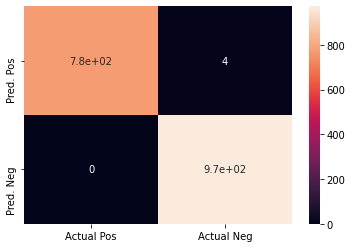

In [108]:
#plot confusion matrixs for AdaBoosting model

def plot_confusion_matrix(tp, fp, fn, tn):
    """
    Plots a confusion matrix using the values 
       tp - True Positive
       fp - False Positive
       fn - False Negative
       tn - True Negative
    """
    data = np.matrix([[tp, fp], [fn, tn]])

    sns.heatmap(data,annot=True,xticklabels=['Actual Pos', 'Actual Neg']
              ,yticklabels=['Pred. Pos', 'Pred. Neg']) 

y_pred_abc = abc_model.predict(X_test[important_features])
df_confusion = pd.crosstab(y_test, y_pred_abc, rownames=['Actual'], colnames=['Predicted'])
cnf_matrix=np.array(df_confusion)

tp=cnf_matrix[1,1]

tn=cnf_matrix[0,0]

fp=cnf_matrix[0,1]

fn=cnf_matrix[1,0]


plot_confusion_matrix(tp, fp, fn, tn)

Insights Learned: The confusion matrixs above shows that for AdaBoosting model, there are only 4 false positive and 0 false negative in the test dataset, which performs better than that of logistic regression and random forest classifier. 

In [109]:
#Predict the response for test dataset

y_pred_test_abc = abc_model.predict(X_test_randomforest)

test_data['certified'] = y_pred_test_abc

In [110]:
#output the result
to_save = test_data[['userid_DI', 'certified']].copy()

from google.colab import files

to_save.to_csv('submission6.csv', index=False) 

files.download('submission6.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


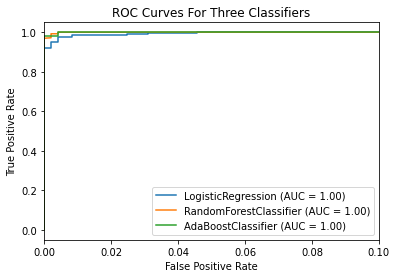

In [111]:
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt  

lr = LogisticRegression()
rd = RandomForestClassifier()
ada = AdaBoostClassifier()

lr.fit(X_train, y_train)
rd.fit(X_train[important_features], y_train)
ada.fit(X_train[important_features], y_train)

disp = metrics.plot_roc_curve(lr, X_validation, y_validation)
metrics.plot_roc_curve(rd,X_validation[important_features], y_validation, ax=disp.ax_)
metrics.plot_roc_curve(ada, X_validation[important_features], y_validation, ax=disp.ax_)

plt.xlim(0,0.1)
plt.title('ROC Curves For Three Classifiers')
plt.show()

Insights Learned: The graph above shows the ROC curve for the three classifiers. Since they overlap, I adjust the scale of x-axis so  we can see the distinctions between curves. We can see that AdaBoost classifier and random forest classifer have better performance than logistic regression. I would like to pick AdaBoost as the best classifer since it generates the highest accuracy score. 

Summary:

*   Three classifiers (logistic, random forest, AdaBoosting) have been used in predict completion of an online course based on the activity of a student. 

Data Cleaning & Transformation

*   Since the raw training dataset contains many categorical data, I use one-hot encoding to transform those categorical variables into binary numeric variables. 
*   Many variables have missing values, shown in NaN. To improve the data quality and prediction accuracy, I use imputation method to replace the missing values. For categorical variables, I use mode for missing values.For numeric variables, I use mean. 

Feature Selection

*   For logistic regression, all variables (except 'certified' and 'userID_DI') have been used as features. 
*   For random forest classifier and AdaBoosting classifier, I generate the feature importance for all the features and use 0.01 as the threshold. Any features with feature importance greater than 0.01 have been selected and used in those two models. 
*   The most important features in predicting the outcomes are mostly variables closly related to student activities, such as grade, viewed, number of active days, etc. 

Hyperparameter Tuning:
*   For random forest and AdaBoosting, I use gridsearchCV to tune the hyperparameters. It helps to find the most suitable hyperparameters, including n_estimators, max_depth, etc. 

Model Evaluation:
*   I split the cleaned and transformed data into three datasets: train dataset(70%), test dataset(20%) and validation dataset(10%). 
*   Two methods have been used to evaluate the model performance: accuracy score and confusion matrixs. 
*   Logistic regression has a 98.8% accuracy on the validation dataset. Random forest and AdaBoosting models have 99.7% and 99.8% accuracy rate, respectively. 
*   Since the class is slightly imbalanced in the raw dataset, accuracy score may not be the best measure of the model performance. Therefore, I also use confusion matrixs to evaluate how those models will perform on the unseen data. The results show that AdaBoosting classifer has the lowest generalization error. 

Final Model Selection: 
*   I select AdaBoosting classifer as the model since it has the best performance on validation dataset and lowest generalization error and it's fast and simple. 






